In [2]:
%%capture
%pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data for TEG is collected.

In [4]:
import pandas as pd
expdata_df = pd.read_csv('../../../data/thermodynamics/heatcapacity/water.csv')
expdata_df

,ID,HeatCapacityCp,ComponentName,StdDev,Temperature,Pressure,PhaseType,Reference
0,1,4.225894,water,0.042259,273.15,10,liquid,Stephens1979
1,2,4.203673,water,0.042037,283.15,10,liquid,DIPPR
2,3,4.188584,water,0.041886,293.15,10,liquid,DIPPR
3,4,4.179521,water,0.041795,303.15,10,liquid,DIPPR
4,5,4.175507,water,0.041755,313.15,10,liquid,DIPPR
5,6,4.175686,water,0.041757,323.15,10,liquid,DIPPR
6,7,4.179328,water,0.041793,333.15,100,liquid,DIPPR
7,8,4.185829,water,0.041858,343.15,100,liquid,DIPPR
8,9,4.194709,water,0.041947,353.15,100,liquid,DIPPR
9,10,4.205612,water,0.042056,363.15,100,liquid,DIPPR


<Figure size 640x480 with 0 Axes>

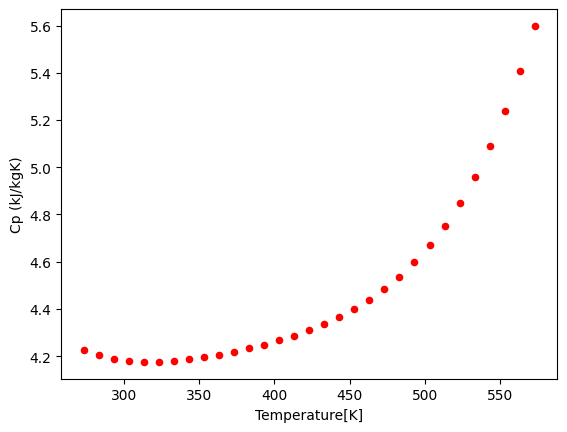

In [5]:
from matplotlib import pyplot as plt
fig = plt.figure()

expdata_df.plot(x='Temperature', y='HeatCapacityCp', kind='scatter',ylabel='Cp (kJ/kgK)', xlabel='Temperature[K]',color='red')

plt.show()

# Evaluation of experimental data

In this section the experimental data will be evaluated and eventual some data sets will be removed from the set.

# Compare to NeqSim Calculations

## NeqSim calculations at 288.15 K

<Figure size 640x480 with 0 Axes>

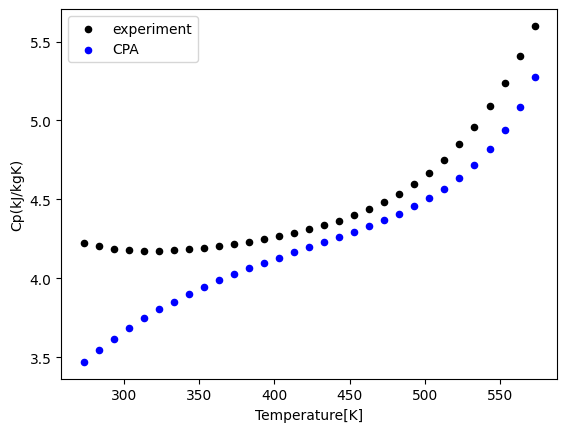

In [13]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('water', 1.0)
fluid1.setTemperature(15.0, 'C')
fluid1.setPressure(100.0, 'bara')

def heatcap(input):
    fluid1.setTemperature(input[0], 'K')
    fluid1.setPressure(input[1], 'bara')
    TPflash(fluid1)
    fluid1.initProperties()
    return fluid1.getPhase('aqueous').getCp('kJ/kgK')

temperatures = expdata_df['Temperature'].values.tolist()
pressures = expdata_df['Pressure'].values.tolist()
input = zip(temperatures,pressures)
cP_res = [heatcap(inp) for inp in input]

dataWithExperiment = expdata_df.assign(cP_res = cP_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = dataWithExperiment.plot(x='Temperature', y='HeatCapacityCp', kind='scatter',ylabel='Cp(kJ/kgK)', xlabel='Temperature[K]',color='black')	
dataWithExperiment.plot(ax=plot1, x='Temperature', y='cP_res', kind='scatter',ylabel='Cp(kJ/kgK)', xlabel='Temperature[K]',color='blue')	
plt.legend(['experiment', 'CPA'])
plt.show()

# Parameter fitting

## Manual fitting

## Automatic fitting